In [1]:
from cucim import CuImage
from cucim.clara.cache import calc_preferred_cache_memory

img = CuImage("notebooks/input/image.tif")
memory_capacity = calc_preferred_cache_memory(img, (256, 256))
CuImage.cache("per_process", memory_capacity=memory_capacity, record_stat=True)
#CuImage.cache("per_process", memory_capacity=2048, record_stat=True)

region = img.read_region((0,0), (100,100))

cache = CuImage.cache()

In [2]:
cache.config

{'type': 'per_process',
 'memory_capacity': 2048,
 'capacity': 5461,
 'mutex_pool_capacity': 11117,
 'list_padding': 10000,
 'extra_shared_memory_size': 100,
 'record_stat': True}

In [3]:
print(f"cache hit: {cache.hit_count}, chche miss: {cache.miss_count}")

cache hit: 0, chche miss: 1


In [4]:
region = img.read_region((0,0), (100,100))

print(f"cache hit: {cache.hit_count}, chche miss: {cache.miss_count}")
print(f"items in cache: {cache.size}/{cache.capacity}, memory usage in cache: {cache.memory_size}/{cache.memory_capacity}")

cache hit: 1, chche miss: 1
items in cache: 1/5461, memory usage in cache: 196608/2147483648


In [1]:
from cucim import CuImage
img = CuImage("notebooks/input/image.tif")

In [3]:
dir(img._C)


['__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_set_array_interface',
 'associated_image',
 'associated_images',
 'cache',
 'channel_names',
 'coord_sys',
 'device',
 'dims',
 'direction',
 'dtype',
 'is_loaded',
 'metadata',
 'ndim',
 'origin',
 'path',
 'raw_metadata',
 'read_region',
 'resolutions',
 'save',
 'shape',
 'size',
 'spacing',
 'spacing_units']

In [1]:
from cucim import CuImage

img = CuImage("notebooks/input/image.tif")

In [5]:
%%timeit

img.is_loaded

430 ns ± 4.64 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [6]:
%%timeit
img._C.is_loaded

177 ns ± 1.51 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [14]:
!pip install --force-reinstall dist/*.whl

dir(img)

Processing ./dist/cucim-0.19.1.dev2-py3-none-manylinux2014_x86_64.whl
  Using cached numpy-1.20.3-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.4 MB)
  Using cached click-8.0.1-py3-none-any.whl (97 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Attempting uninstall: click
    Found existing installation: click 8.0.1
    Uninstalling click-8.0.1:
      Successfully uninstalled click-8.0.1
  Attempting uninstall: cucim
    Found existing installation: cucim 0.19.1.dev2
    Uninstalling cucim-0.19.1.dev2:
      Successfully uninstalled cucim-0.19.1.dev2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
rasterio 1.2.3 requires click<8,>=4.0, but you have click 8.0.1 which is incompatible.
cligj 0.7.1 requires click<8,>=4.0, but you have click 8

['__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_set_array_interface',
 'associated_image',
 'associated_images',
 'cache',
 'channel_names',
 'coord_sys',
 'device',
 'dims',
 'direction',
 'dtype',
 'is_loaded',
 'metadata',
 'ndim',
 'origin',
 'path',
 'raw_metadata',
 'read_region',
 'resolutions',
 'save',
 'shape',
 'size',
 'spacing',
 'spacing_units']

In [3]:
%%timeit

img.is_loaded

161 ns ± 0.967 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [9]:
help(img.read_region)

Help on method read_region in module cucim.clara._cucim:

read_region(...) method of cucim.clara.CuImage instance
    read_region(self: cucim.clara._cucim.CuImage, location: List[int] = [], size: List[int] = [], level: int = 0, device: cucim.clara._cucim.io.Device = cpu, buf: object = None, shm_name: str = '', **kwargs) -> object
    
    Returns a subresolution image.
    
    - `location` and `size`'s dimension order is reverse of image's dimension order.
    - Need to specify (X,Y) and (Width, Height) instead of (Y,X) and (Height, Width).
    - If location is not specified, location would be (0, 0) if Z=0. Otherwise, location would be (0, 0, 0)
    - Like OpenSlide, location is level-0 based coordinates (using the level-0 reference frame)
    - If `size` is not specified, size would be (width, height) of the image at the specified `level`.
    - `<not supported yet>` Additional parameters (S,T,C,Z) are similar to
    <https://allencellmodeling.github.io/aicsimageio/aicsimageio.html#

In [6]:
from cucim import CuImage
img = CuImage("notebooks/input/image.tif")
region = img.read_region((1000,1000), (100, 100))

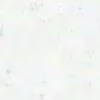

In [7]:
from PIL import Image
import numpy as np
Image.fromarray(np.asarray(region))

In [8]:
import cupy as cp

region_cupy = img.read_region((1000,1000), (100, 100), device='cuda')
vis = cp.asarray(region_cupy)

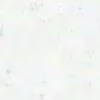

In [15]:
Image.fromarray(vis.get())

In [16]:
del vis

In [12]:
b.__array_interface__

{'data': (46733280, False),
 'strides': None,
 'descr': [('', '|u1')],
 'typestr': '|u1',
 'shape': (10, 10, 3),
 'version': 3}

In [13]:
!pip install cupy-cuda112

You should consider upgrading via the '/home/gbae/.virtualenvs/cucim/bin/python -m pip install --upgrade pip' command.
